<b>Import the Modules</b>

In [696]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
%matplotlib inline

In [697]:
df = pd.read_csv('dataset.csv') #Reading Data from csv File

<b>Exploratory Data Analysis</b>

In [698]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [699]:
df.isna().sum()# no null values in the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
StreamingService    0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [700]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [701]:
df.shape

(7043, 16)

In [702]:
print(df.apply(lambda col: str(col.unique())))  ##to have an idea about the kind of values present in each column, we used str to typecast, otherwise array will be returned

customerID          ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4...
gender                                              ['Female' 'Male']
SeniorCitizen                                                   [0 1]
Partner                                                  ['Yes' 'No']
Dependents                                               ['No' 'Yes']
tenure              [1 34 2 45 8 22 10 28 62 13 16 58 49 25 69 52 ...
PhoneService                                             ['No' 'Yes']
MultipleLines                         ['No phone service' 'No' 'Yes']
InternetService                            ['DSL' 'Fiber optic' 'No']
StreamingService                   ['No' 'Yes' 'No internet service']
Contract                     ['Month-to-month' 'One year' 'Two year']
PaperlessBilling                                         ['Yes' 'No']
PaymentMethod       ['Electronic check' 'Mailed check' 'Bank trans...
MonthlyCharges                 [29.85 56.95 53.85 ... 63.1 44.2 78.7]
TotalCharges        

In [703]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
StreamingService     object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [737]:
#We will check the correlation of every Feature with Target Variable(Churn)
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

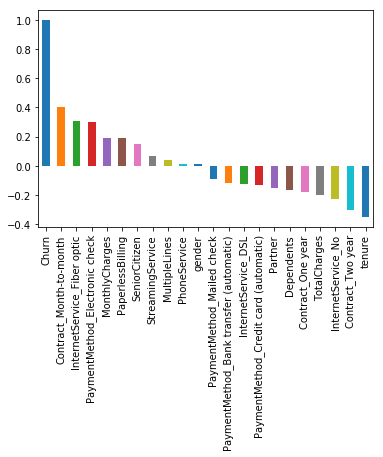

In [738]:
#Visualizing correlation of every Feature with Target Variable(Churn)
corr_matrix["Churn"].sort_values(ascending=False).plot(kind = 'bar')

#It Shows that 'gender' and 'PhoneService' has the least correlation with Churn.
#That is Values in Gender and type of Phone Service a person has does not have any impact on chances of him/her getting Churned.

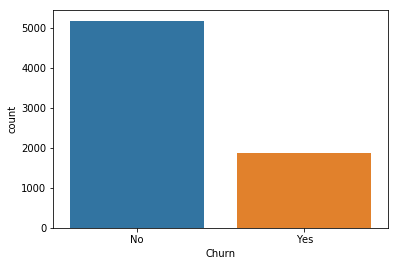

In [708]:
sns.countplot(df['Churn']) #highly imbalanced

<b>Data Preprocessing</b>

In [709]:
 # We Deduce that ''Total Charges '' is of type Object, though it has Numeric Value, so we would convert it types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') #used errors = coerce to ignore the empty strings while converting dtype to numebers

In [710]:
df.drop(columns = 'customerID',inplace = True) ##since it was not adding any value to the dataset

<b>Covert Categorical Variable to Numerical Variable</b>

In [711]:
df['gender'] = df['gender'].map({'Female':1,'Male':0})

In [712]:
tobeencoded = ['Partner','Dependents','PhoneService','StreamingService','PaperlessBilling','Churn','MultipleLines']

for col in tobeencoded:
    df[col]=df[col].map({'Yes':1,'No':0,'No phone service':0,'No internet service':0})

In [713]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,StreamingService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [714]:
df = pd.get_dummies(df,columns=['InternetService'],prefix='InternetService')
df = pd.get_dummies(df,columns=['Contract'],prefix='Contract')
df = pd.get_dummies(df,columns=['PaymentMethod'],prefix='PaymentMethod')

<b>Feature Scaling</b>

In [715]:
scaler = MinMaxScaler()
# fit and transform the data
df['tenure'] = pd.DataFrame(scaler.fit_transform(df[['tenure']]))
df['MonthlyCharges'] = pd.DataFrame(scaler.fit_transform(df[['MonthlyCharges']]))
df['TotalCharges'] = pd.DataFrame(scaler.fit_transform(df[['TotalCharges']]))

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,StreamingService,PaperlessBilling,MonthlyCharges,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0.115423,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,0,0,0.385075,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,0,1,0.354229,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,0,0,0.239303,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,1,0.521891,...,0,1,0,1,0,0,0,0,1,0


In [716]:
df.isnull().sum() #to check if any Value has not Turned to null Value while Data Preprocessing

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
StreamingService                            0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check        

In [717]:
df = df.dropna(how='any',axis=0)

In [718]:
X = df.drop(['Churn','gender'],axis=1) #Dropping gender variable since it is not adding any value to the dataset and it's correlation with Target Variable is very less 
y = df['Churn']

<b>Train Test Split</b>

In [719]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify = y)

<b>Logistic Regression</b>

In [720]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
sc= clf.score(X_test,y_test)
sc

0.8073916133617626

In [721]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



<b><i>It can be seen that f1-score for class 1 is very less and for class 0 is high, so it indictaes that we have Imabalance Training Data. Hence We will Use SMOTE to Handle this Imbalance.</b></i>

<b>SMOTE(Synthetic Minority Oversampling Technique)</b>

In [722]:
sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7032, 20)
Shape of X after SMOTE: (10326, 20)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn, dtype: float64

In [723]:
XLr_train, XLr_test, yLr_train, yLr_test = train_test_split(X_sm, y_sm,test_size=0.20, random_state=42)

In [724]:
clf = LogisticRegression(random_state=42,max_iter = 200).fit(XLr_train, yLr_train)
yLr_pred_test = clf.predict(XLr_test)
sc= clf.score(XLr_test,yLr_test)
sc

0.7691190706679574

In [725]:
print(classification_report(yLr_test, yLr_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1037
           1       0.75      0.80      0.78      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



<b><i>Logistic Regression provides us with the Accuracy of 76.9% and F1 Measure of 78%. Hence we will now try another Model with an aim of getting an improved efficiency </b></i>

<b>Random Forest</b>

In [726]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X_sm, y_sm,test_size=0.20, random_state=42)

In [727]:
rf = RandomForestClassifier(random_state = 42)
# Train the model on training data
rf.fit(Xrf_train,yrf_train)

RandomForestClassifier(random_state=42)

In [728]:
print(rf.score(Xrf_test,yrf_test))

0.8257502420135527


In [729]:
yrf_pred_test = rf.predict(Xrf_test)

In [730]:
accuracy_score(yrf_test, yrf_pred_test)

0.8257502420135527

In [ ]:
#Random Forest is providing the accuracy of 82.5%. Now we will Check F-measure for same.

In [731]:
confusion_matrix(yrf_test, yrf_pred_test)

array([[836, 201],
       [159, 870]], dtype=int64)

In [732]:
print(classification_report(yrf_test, yrf_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1037
           1       0.81      0.85      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



<b><i>Random Forest Provide us the Accuracy of 82.5% and F-Measure as 83% which is Considered as comparably good model.</b></i>